# Data Cleansing

Outline:

- [Data Understanding](#Data-Understanding)
    * Reading in and Exploring Data
    * Dealing with Column Names
    * Slicing Dataset
- [Cleaning and Exploring Columns](#Cleaning-and-Exploring-Columns)
    * [Safety & Security](#Safety-&-Security)
    * [Model](#Model)

## Data Understanding

In [49]:
# Import necessay modules
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Display 100 columns max
pd.set_option('display.max_columns', 100)

In [2]:
pwd

'/Users/stb/Documents/GitHub/fraud-detection/trgt/data-cleansing'

In [3]:
# Initiate directory paths
data_folder = '/Users/stb/Documents/Github/fraud-detection/data/'
functions_folder = '/Users/stb/Documents/Github/fraud-detection/functions/'

### Reading in and Exploring Data

In [4]:
ads_list = []
with open(data_folder + 'autos_20190616.json','r') as file:
    ads = file.read().split("\n")
    for ad in ads:
        ad_obj = json.loads(ad)
        ads_list.append(ad_obj)
autos = pd.DataFrame(ads_list)

In [5]:
autos = pd.DataFrame(ads_list)
autos.head()

,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Availability,Available from,Body,Body Color,Body Color Original,CO2 Emission,Consumption,Country version,Cylinders,Displacement,Drive chain,Electricity consumption,Emission Class,Emission Label,First Registration,Fuel,Full Service,Gearing Type,Gears,Inspection new,Last Service Date,Last Timing Belt Service Date,Make,Model,Model Code,Next Inspection,Non-smoking Vehicle,Nr. of Doors,Nr. of Seats,Offer Number,Other Fuel Types,Paint Type,Previous Owners,Type,Upholstery,Warranty,Weight,body_type,description,hp,kW,km,model,null,price,registration,vat,version
0,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Roof rack]","[ABS, Central door lock, Daytime running light...",NaN,NaN,"[\n, Station wagon, \n]","[\n, Black, \n]",[\nBrillantschwarz\n],[\n122 g CO2/km (comb)\n],"[[4.6 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",NaN,NaN,[\nEuro 6\n],NaN,"[\n, 2015, \n]","[\n, Diesel, \n]","[\n, \n, \nEuro 6\n]","[\n, Automatic, \n]",NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,"[\n02/2020\n, \n122 g CO2/km (comb)\n]","[\n, \n, \n4 (Green)\n]",[\n4\n],[\n5\n],NaN,NaN,[\nMetallic\n],"[\n1\n, \n, 4.6 l/100 km (comb), \n, \n, \n]","[\n, Used, \n, \n, Diesel, \n]","[\nCloth, Black\n]",NaN,NaN,Station wagon,"[\n, Sonderausstattung:, Außenspiegel elektr. ...",[110 kW],[],"[190,500 km]",Audi A4,[],"\n€ 11,990.-\n","[03/2015, 1 previous owner]",[],Avant Ambient/I HAND/XENON/NAVI/S-Line
1,"[Air conditioning, Automatic climate control, ...","[Bluetooth, MP3, On-board computer, Radio]",[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,"[\n, Station wagon, \n]","[\n, Black, \n]",[\nNero\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[], [], []]",NaN,"[\n, 2014, \n]","[\n, Diesel, \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,[\n5\n],[\n5\n],[\n2710463\n],NaN,[\nMetallic\n],"[\n2\n, \nEuro 6\n]","[\n, Used, \n, \n, Diesel, \n]","[\nCloth, Grey\n]",NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4,[],"\n€ 12,200.-\n","[11/2014, 2 previous owners]",[],2.0 TDI CD 110kW multitronic Business
2,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, O...","[Alloy wheels, Roof rack, Trailer hitch]","[ABS, Alarm system, Central door lock, Daytime...",NaN,NaN,"[\n, Station wagon, \n]","[\n, Grey, \n]",[\nMonsungrau Metallic\n],[\n125 g CO2/km (comb)\n],"[[4.7 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nfront\n],NaN,[\nEuro 5\n],[\n4 (Green)\n],"[\n, 2015, \n]","[\n, Diesel, \n]","[\n, \n, \nEuro 5\n]","[\n, Automatic, \n]",[\n8\n],NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",[\n0588/AXN\n],"[\n03/2020\n, \n125 g CO2/km (comb)\n]",NaN,[\n4\n],[\n5\n],[\n220418\n],NaN,[\nMetallic\n],"[\n1\n, \n, 4.7 l/100 km (comb), \n, \n, \n]","[\n, Used, \n, \n, Diesel, \n]","[\nCloth, Black\n]",NaN,NaN,Station wagon,"[\nFahrzeugnummer: 220418, A4 Avant 2.0 TDI mu...",[110 kW],[],"[148,300 km]",Audi A4,[],"\n€ 12,250.-\n","[03/2015, 1 previous owner]",[VAT deductible],2.0 TDI Avant Multitr. Ambiente NAVI+ TEMPO
3,"[Air conditioning, Automatic climate control, ...","[Bluetooth, MP3, On-board computer, Radio]",[Alloy wheels],"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,"[\n, Station wagon, \n]","[\n, Black, \n]",[\nNero\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[], [], []]",NaN,"[\n, 2014, \n]","[\n, Diesel, \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,[\n5\n],[\n5\n],[\n2710463\n],NaN,[\nMetallic\n],"[\n2\n, \nEuro 6\n]","[\n, Used, \n, \n, Diesel, \n]","[\nCloth, Grey\n]",NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4,[],"\n€ 12,200.-\n","[11/2014, 2 previous owners]",[],2.0 TDI CD 110kW multitronic Business
4,"[Air conditioning, Automatic climate control,

In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9558 entries, 0 to 9557
Data columns (total 52 columns):

Comfort & Convenience
          9056 non-null object

Entertainment & Media
          8458 non-null object

Extras
                         7820 non-null object

Safety & Security
              8815 non-null object
Availability                     74 non-null object
Available from                   26 non-null object
Body                             9522 non-null object
Body Color                       9455 non-null object
Body Color Original              5594 non-null object
CO2 Emission                     8394 non-null object
Consumption                      8139 non-null object
Country version                  4004 non-null object
Cylinders                        6086 non-null object
Displacement                     9140 non-null object
Drive chain                      4648 non-null object
Electricity consumption          39 non-null object
Emission Class                   83

### Dealing with Column Names

In [7]:
autos.columns

Index(['\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'Availability', 'Available from', 'Body',
       'Body Color', 'Body Color Original', 'CO2 Emission', 'Consumption',
       'Country version', 'Cylinders', 'Displacement', 'Drive chain',
       'Electricity consumption', 'Emission Class', 'Emission Label',
       'First Registration', 'Fuel', 'Full Service', 'Gearing Type', 'Gears',
       'Inspection new', 'Last Service Date', 'Last Timing Belt Service Date',
       'Make', 'Model', 'Model Code', 'Next Inspection', 'Non-smoking Vehicle',
       'Nr. of Doors', 'Nr. of Seats', 'Offer Number', 'Other Fuel Types',
       'Paint Type', 'Previous Owners', 'Type', 'Upholstery', 'Warranty',
       'Weight', 'body_type', 'description', 'hp', 'kW', 'km', 'model', 'null',
       'price', 'registration', 'vat', 'version'],
      dtype='object')

In [8]:
# Find duplicate column names
print(autos.columns[autos.columns.duplicated()])

'''
Column isimleri immutable oldugu icin, `df.columns[0] = "col_name"` gibi bir islem
yapamiyoruz. DataFrame.rename() bizim tek bir column ismini kolay bir sekilde
degistirmemizi sagliyor.
'''
# Rename duplicate column name "Model"
# autos.rename(columns={"model" : "model2"}, inplace = True)

Index([], dtype='object')


'\nColumn isimleri immutable oldugu icin, `df.columns[0] = "col_name"` gibi bir islem\nyapamiyoruz. DataFrame.rename() bizim tek bir column ismini kolay bir sekilde\ndegistirmemizi sagliyor.\n'

In [9]:
# Find duplicate column names (alternative)
i = np.where(autos.columns.str.lower().duplicated())[0][0]
print(autos.columns[i])

# Rename duplicate column name "Model"
autos.rename(columns={"model" : "model2"}, inplace = True)
print(autos.columns[i])

model
model2


In [10]:
# Run "name_columns" function to name the columns in our convention
%run -i "/Users/stb/Documents/Github/fraud-detection/functions/name_columns.py"

Alternatively, we can load the file into the cell with the `%load` magic command. (`%load?` for more info)

In [12]:
# %load "/Users/stb/Documents/Github/fraud-detection/functions/name_columns.py"
def name_columns(data):
    '''
    Name columns with underscore(_) convention.
    '''
    # Clean "\n"s from the column names
    data.columns = data.columns.str.strip("\n")

    # Make lowercase
    data.columns = data.columns.str.lower()
    
    # Replace space with underscore(_)
    data.columns = data.columns.str.replace(" ", "_")
    
    # Replace . with ""
    data.columns = data.columns.str.replace(".", "")
    
    # Replace "_&_" with "&"
    data.columns = data.columns.str.replace("_&_", "&")
    
    return data.columns

In [13]:
autos.columns = name_columns(autos)
autos.columns

Index(['comfort&convenience', 'entertainment&media', 'extras',
       'safety&security', 'availability', 'available_from', 'body',
       'body_color', 'body_color_original', 'co2_emission', 'consumption',
       'country_version', 'cylinders', 'displacement', 'drive_chain',
       'electricity_consumption', 'emission_class', 'emission_label',
       'first_registration', 'fuel', 'full_service', 'gearing_type', 'gears',
       'inspection_new', 'last_service_date', 'last_timing_belt_service_date',
       'make', 'model', 'model_code', 'next_inspection', 'non-smoking_vehicle',
       'nr_of_doors', 'nr_of_seats', 'offer_number', 'other_fuel_types',
       'paint_type', 'previous_owners', 'type', 'upholstery', 'warranty',
       'weight', 'body_type', 'description', 'hp', 'kw', 'km', 'model2',
       'null', 'price', 'registration', 'vat', 'version'],
      dtype='object')

In [14]:
#>>>Following code can be used to have Title-Like column names.

# # Clean "\n"s from the column names
# autos.columns = autos.columns.str.strip("\n")

# # Clean "_"s  from the column names
# autos.columns = autos.columns.str.replace("_", " ")

# # Capitalize all words 
# autos.columns = autos.columns.str.title()

# # Print column names
# autos.columns

In [15]:
# Capitalize all words (alternative way for one string)
# split = autos.columns[0].split(" ")
# ' '.join(x.capitalize() for x in split)

# >>> Bu yontemi tum columns'a nasil uygulariz?

### Slicing Dataset

In [127]:
t_cols = ['safety&security', 'co2_emission', 'consumption', 'country_version', 
          'cylinders', 'displacement', 'make', 'model', 'model_code', 'next_inspection',
          'non-smoking_vehicle', 'body_type', 'description', "hp", 'kw', 'km', "model2"]

In [128]:
df = autos[t_cols]

In [129]:
df.head()

,safety&security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non-smoking_vehicle,body_type,description,hp,kw,km,model2
0,"[ABS, Central door lock, Daytime running light...",[\n122 g CO2/km (comb)\n],"[[4.6 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",NaN,"[\n02/2020\n, \n122 g CO2/km (comb)\n]","[\n, \n, \n4 (Green)\n]",Station wagon,"[\n, Sonderausstattung:, Außenspiegel elektr. ...",[110 kW],[],"[190,500 km]",Audi A4
1,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4
2,"[ABS, Alarm system, Central door lock, Daytime...",[\n125 g CO2/km (comb)\n],"[[4.7 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",[\n0588/AXN\n],"[\n03/2020\n, \n125 g CO2/km (comb)\n]",NaN,Station wagon,"[\nFahrzeugnummer: 220418, A4 Avant 2.0 TDI mu...",[110 kW],[],"[148,300 km]",Audi A4
3,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4
4,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9558 entries, 0 to 9557
Data columns (total 17 columns):
safety&security        8815 non-null object
co2_emission           8394 non-null object
consumption            8139 non-null object
country_version        4004 non-null object
cylinders              6086 non-null object
displacement           9140 non-null object
make                   9558 non-null object
model                  9558 non-null object
model_code             2444 non-null object
next_inspection        2549 non-null object
non-smoking_vehicle    4396 non-null object
body_type              9522 non-null object
description            9558 non-null object
hp                     9558 non-null object
kw                     9558 non-null object
km                     9558 non-null object
model2                 9558 non-null object
dtypes: object(17)
memory usage: 1.2+ MB


In [20]:
df.head()

,safety&security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non-smoking_vehicle,body_type,description,hp,kw,km,model2
0,"[ABS, Central door lock, Daytime running light...",[\n122 g CO2/km (comb)\n],"[[4.6 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",NaN,"[\n02/2020\n, \n122 g CO2/km (comb)\n]","[\n, \n, \n4 (Green)\n]",Station wagon,"[\n, Sonderausstattung:, Außenspiegel elektr. ...",[110 kW],[],"[190,500 km]",Audi A4
1,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4
2,"[ABS, Alarm system, Central door lock, Daytime...",[\n125 g CO2/km (comb)\n],"[[4.7 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",[\n0588/AXN\n],"[\n03/2020\n, \n125 g CO2/km (comb)\n]",NaN,Station wagon,"[\nFahrzeugnummer: 220418, A4 Avant 2.0 TDI mu...",[110 kW],[],"[148,300 km]",Audi A4
3,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4
4,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4


## Cleaning and Exploring Columns

### Safety & Security

In [21]:
# Number of missing values (NaNs) of a column
print(df['safety&security'].isnull().sum())

# Change the type of NaNs from float to (empty) list
# df['safety&security'][df['safety&security'].isnull()].apply(lambda x: [])

743


In [22]:
def NaN_to_list(data, column_name):
    '''
    When dealing with a column which consist of lists, we need to change
    the type of NaNs from 'float' to 'list' in order to perform iterative 
    operations. This function detects NaNs and creates an empty list for
    missing rows.
    '''
    # Create a boolean vector for indexing
    NaN_rows = data[column_name].isnull()
    
    # Change the type of NaNs from 'float' to (empty) 'list'
    data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x: [])

In [23]:
NaN_to_list(df, 'safety&security')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/stb/Documents/Github/fraud-detection/functions/name_columns.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data.columns = data.columns.str.replace(" ", "_")


In [24]:
# Check to see if there are remaining NaNs
df['safety&security'].isnull().sum()

0

In [25]:
def get_uniques(data, column_name):
    '''
    Get the unique elements from a column
    which consists of list of items.
    '''
    unique_vals = set()
    
    for row in data[column_name]:
        # Add list of items to a set
        unique_vals.update(row)

    return unique_vals

In [26]:
uniques = get_uniques(df, 'safety&security')

In [27]:
len(uniques), uniques

(29,
 {'ABS',
  'Adaptive Cruise Control',
  'Adaptive headlights',
  'Alarm system',
  'Blind spot monitor',
  'Central door lock',
  'Central door lock with remote control',
  'Daytime running lights',
  'Driver drowsiness detection',
  'Driver-side airbag',
  'Electronic stability control',
  'Emergency brake assistant',
  'Emergency system',
  'Fog lights',
  'Head airbag',
  'Immobilizer',
  'Isofix',
  'LED Daytime Running Lights',
  'LED Headlights',
  'Lane departure warning system',
  'Night view assist',
  'Passenger-side airbag',
  'Power steering',
  'Rear airbag',
  'Side airbag',
  'Tire pressure monitoring system',
  'Traction control',
  'Traffic sign recognition',
  'Xenon headlights'})

In [28]:
# Create a new list to use later for encoding
encode_list = uniques

In [41]:
# Create a list of new column names (with lowercase letter)
uniques_lower = [c.lower().replace(" ", "_") for c in list(uniques)]

# Check
print(uniques_lower)

['passenger-side_airbag', 'immobilizer', 'night_view_assist', 'led_daytime_running_lights', 'emergency_brake_assistant', 'fog_lights', 'electronic_stability_control', 'traction_control', 'adaptive_cruise_control', 'driver_drowsiness_detection', 'rear_airbag', 'alarm_system', 'head_airbag', 'lane_departure_warning_system', 'adaptive_headlights', 'blind_spot_monitor', 'central_door_lock', 'power_steering', 'side_airbag', 'xenon_headlights', 'led_headlights', 'tire_pressure_monitoring_system', 'driver-side_airbag', 'isofix', 'daytime_running_lights', 'central_door_lock_with_remote_control', 'emergency_system', 'traffic_sign_recognition', 'abs']


In [30]:
# Create a list of column names
new_columns = df.columns.tolist() + uniques_lower

# Check to see if it's working
print(new_columns)

['safety&security', 'co2_emission', 'consumption', 'country_version', 'cylinders', 'displacement', 'make', 'model', 'model_code', 'next_inspection', 'non-smoking_vehicle', 'body_type', 'description', 'hp', 'kw', 'km', 'model2', 'passenger-side_airbag', 'immobilizer', 'night_view_assist', 'led_daytime_running_lights', 'emergency_brake_assistant', 'fog_lights', 'electronic_stability_control', 'traction_control', 'adaptive_cruise_control', 'driver_drowsiness_detection', 'rear_airbag', 'alarm_system', 'head_airbag', 'lane_departure_warning_system', 'adaptive_headlights', 'blind_spot_monitor', 'central_door_lock', 'power_steering', 'side_airbag', 'xenon_headlights', 'led_headlights', 'tire_pressure_monitoring_system', 'driver-side_airbag', 'isofix', 'daytime_running_lights', 'central_door_lock_with_remote_control', 'emergency_system', 'traffic_sign_recognition', 'abs']


In [31]:
# Create new columns with the new column names
df.reindex(columns = new_columns, fill_value = 0).head(3)

### While this is a way to create new columns from a list, a better way is shown below

,safety&security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non-smoking_vehicle,body_type,description,hp,kw,km,model2,passenger-side_airbag,immobilizer,night_view_assist,led_daytime_running_lights,emergency_brake_assistant,fog_lights,electronic_stability_control,traction_control,adaptive_cruise_control,driver_drowsiness_detection,rear_airbag,alarm_system,head_airbag,lane_departure_warning_system,adaptive_headlights,blind_spot_monitor,central_door_lock,power_steering,side_airbag,xenon_headlights,led_headlights,tire_pressure_monitoring_system,driver-side_airbag,isofix,daytime_running_lights,central_door_lock_with_remote_control,emergency_system,traffic_sign_recognition,abs
0,"[ABS, Central door lock, Daytime running light...",[\n122 g CO2/km (comb)\n],"[[4.6 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",NaN,"[\n02/2020\n, \n122 g CO2/km (comb)\n]","[\n, \n, \n4 (Green)\n]",Station wagon,"[\n, Sonderausstattung:, Außenspiegel elektr. ...",[110 kW],[],"[190,500 km]",Audi A4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"[ABS, Alarm system, Central door lock, Daytime...",[\n125 g CO2/km (comb)\n],"[[4.7 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",[\n0588/AXN\n],"[\n03/2020\n, \n125 g CO2/km (comb)\n]",NaN,Station wagon,"[\nFahrzeugnummer: 220418, A4 Avant 2.0 TDI mu...",[110 kW],[],"[148,300 km]",Audi A4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
df.columns

Index(['safety&security', 'co2_emission', 'consumption', 'country_version',
       'cylinders', 'displacement', 'make', 'model', 'model_code',
       'next_inspection', 'non-smoking_vehicle', 'body_type', 'description',
       'hp', 'kw', 'km', 'model2'],
      dtype='object')

In [33]:
'ABS' in df.iloc[0, 0], int('ABS' in df.iloc[0, 0])

(True, 1)

In [34]:
pd.Series(["ABS" in x for x in df['safety&security']]).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [35]:
def encode_column (data, encode_list, column_name):
    '''
    Encode the column as follows: 
    True if the car has a certain attribute, False if not
    '''
    for i in encode_list:
        data[i] = pd.Series([i in x for x in data[column_name]])
    data.is_copy
    return data

In [36]:
%%time
df2 = encode_column(df.copy(), encode_list, 'safety&security')

CPU times: user 233 ms, sys: 5.95 ms, total: 239 ms
Wall time: 240 ms


/Users/stb/Documents/Github/fraud-detection/functions/name_columns.py:8: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  # Make lowercase


In [37]:
df2.head(3)

,safety&security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non-smoking_vehicle,body_type,description,hp,kw,km,model2,Passenger-side airbag,Immobilizer,Night view assist,LED Daytime Running Lights,Emergency brake assistant,Fog lights,Electronic stability control,Traction control,Adaptive Cruise Control,Driver drowsiness detection,Rear airbag,Alarm system,Head airbag,Lane departure warning system,Adaptive headlights,Blind spot monitor,Central door lock,Power steering,Side airbag,Xenon headlights,LED Headlights,Tire pressure monitoring system,Driver-side airbag,Isofix,Daytime running lights,Central door lock with remote control,Emergency system,Traffic sign recognition,ABS
0,"[ABS, Central door lock, Daytime running light...",[\n122 g CO2/km (comb)\n],"[[4.6 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",NaN,"[\n02/2020\n, \n122 g CO2/km (comb)\n]","[\n, \n, \n4 (Green)\n]",Station wagon,"[\n, Sonderausstattung:, Außenspiegel elektr. ...",[110 kW],[],"[190,500 km]",Audi A4,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,True,True,True,False,False,False,True
1,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,False,False,False,False,True
2,"[ABS, Alarm system, Central door lock, Daytime...",[\n125 g CO2/km (comb)\n],"[[4.7 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",[\n0588/AXN\n],"[\n03/2020\n, \n125 g CO2/km (comb)\n]",NaN,Station wagon,"[\nFahrzeugnummer: 220418, A4 Avant 2.0 TDI mu...",[110 kW],[],"[148,300 km]",Audi A4,True,True,False,False,False,True,True,True,False,False,False,True,False,False,False,False,True,True,True,False,False,True,True,True,True,False,False,False,True


In [39]:
df.head()

,safety&security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non-smoking_vehicle,body_type,description,hp,kw,km,model2
0,"[ABS, Central door lock, Daytime running light...",[\n122 g CO2/km (comb)\n],"[[4.6 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",NaN,"[\n02/2020\n, \n122 g CO2/km (comb)\n]","[\n, \n, \n4 (Green)\n]",Station wagon,"[\n, Sonderausstattung:, Außenspiegel elektr. ...",[110 kW],[],"[190,500 km]",Audi A4
1,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4
2,"[ABS, Alarm system, Central door lock, Daytime...",[\n125 g CO2/km (comb)\n],"[[4.7 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",[\n0588/AXN\n],"[\n03/2020\n, \n125 g CO2/km (comb)\n]",NaN,Station wagon,"[\nFahrzeugnummer: 220418, A4 Avant 2.0 TDI mu...",[110 kW],[],"[148,300 km]",Audi A4
3,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4
4,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4


In [43]:
# Create dummies using the items in the list of 'safety&security' column
%time df_ss = df.join(df['safety&security'].str.join('|').str.get_dummies())

# Print the head of the new DataFrame
df_ss.head()

CPU times: user 300 ms, sys: 21.3 ms, total: 321 ms
Wall time: 321 ms


,safety&security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non-smoking_vehicle,body_type,description,hp,kw,km,model2,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,"[ABS, Central door lock, Daytime running light...",[\n122 g CO2/km (comb)\n],"[[4.6 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",NaN,"[\n02/2020\n, \n122 g CO2/km (comb)\n]","[\n, \n, \n4 (Green)\n]",Station wagon,"[\n, Sonderausstattung:, Außenspiegel elektr. ...",[110 kW],[],"[190,500 km]",Audi A4,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,0,0,1
1,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1
2,"[ABS, Alarm system, Central door lock, Daytime...",[\n125 g CO2/km (comb)\n],"[[4.7 l/100 km (comb)], [], []]",[\nGermany\n],NaN,"[\n1,968 cc\n]",[\nAudi\n],"[\n, A4, \n]",[\n0588/AXN\n],"[\n03/2020\n, \n125 g CO2/km (comb)\n]",NaN,Station wagon,"[\nFahrzeugnummer: 220418, A4 Avant 2.0 TDI mu...",[110 kW],[],"[148,300 km]",Audi A4,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1
4,"[ABS, Central door lock, Driver-side airbag, F...",NaN,NaN,NaN,NaN,NaN,[\nAudi\n],"[\n, A4, \n]",NaN,NaN,NaN,Station wagon,"[\nDEK:[2710463], Per maggiori informazioni, a...",[110 kW],[],"[164,533 km]",Audi A4,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1


In [47]:
df_ss.loc[:, 'ABS':"Xenon headlights"].describe()

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
count,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000,9558.000000
mean,0.879054,0.081398,0.099916,0.218979,0.029399,0.753819,0.215945,0.581398,0.067483,0.845993,0.766792,0.095313,0.034840,0.629944,0.188952,0.629839,0.677129,0.281126,0.099812,0.083909,0.007742,0.799226,0.819209,0.082653,0.791170,0.559008,0.646683,0.039548,0.308851
std,0.326081,0.273459,0.299904,0.413576,0.168932,0.430808,0.411498,0.493356,0.250869,0.360974,0.422896,0.293662,0.183384,0.482845,0.391491,0.482873,0.467598,0.449572,0.299764,0.277265,0.087653,0.400600,0.384865,0.275372,0.406494,0.496532,0.478025,0.194905,0.462044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df_ss.loc[:, 'ABS':"Xenon headlights"].sum().sort_values(ascending=False)

ABS                                      8402
Driver-side airbag                       8086
Power steering                           7830
Passenger-side airbag                    7639
Side airbag                              7562
Electronic stability control             7329
Central door lock                        7205
Isofix                                   6472
Traction control                         6181
Fog lights                               6021
Immobilizer                              6020
Daytime running lights                   5557
Tire pressure monitoring system          5343
Xenon headlights                         2952
LED Daytime Running Lights               2687
Alarm system                             2093
Central door lock with remote control    2064
Head airbag                              1806
Adaptive headlights                       955
LED Headlights                            954
Emergency brake assistant                 911
Lane departure warning system     

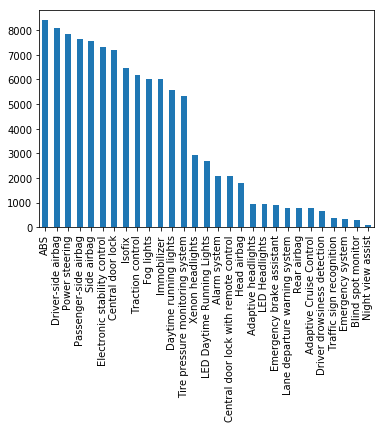

In [63]:
df_ss.loc[:, 'ABS':"Xenon headlights"].sum().sort_values(ascending=False).plot.bar()

### Model

In [131]:
df_ss.model.head()

0    A4
1    A4
2    A4
3    A4
4    A4
Name: model, dtype: object

In [130]:
df_ss.model.sample(10)

2752        A6
7272      Clio
1699        A6
3927        A5
138         A4
9212    Scenic
7442      Clio
8960    Scenic
4678     Corsa
375         A4
Name: model, dtype: object

In [113]:
# Clean the model column
df_ss['model'] = df_ss.model.apply(lambda x: x[1])

In [118]:
# Compare auto models and new columns
df_ss.groupby('model').sum()

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
model,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A4,1368,258,225,497,39,1322,385,945,240,1357,1207,160,69,1299,367,1252,1114,378,208,165,18,1223,1360,174,1237,977,1051,56,805
A5,1169,239,200,357,40,1003,306,837,131,1154,1066,125,42,1138,317,949,933,485,159,129,14,1096,1073,131,1042,810,953,27,890
A6,1414,194,279,540,98,1272,347,967,199,1371,1264,235,85,966,364,1098,1142,608,355,336,31,1233,1405,203,1354,1122,1167,121,1121
Adam,815,17,20,55,52,713,192,630,0,767,722,32,31,132,159,557,652,141,15,2,0,750,780,44,722,569,632,1,4
Clio,1002,20,24,258,2,844,182,593,3,938,799,64,16,574,105,610,610,465,112,2,3,907,806,63,850,390,585,8,29
Corsa,1086,8,44,116,11,910,322,761,2,1056,910,35,49,551,210,598,880,152,18,7,1,1017,1028,43,980,655,769,6,52
Duster,34,0,0,0,0,2,0,0,0,34,1,0,0,16,0,0,2,0,0,0,0,2,34,0,0,0,1,0,0
Meriva,586,4,86,98,0,527,134,380,0,594,536,30,18,419,108,378,449,103,10,2,0,544,571,53,556,377,413,0,2
Scenic,928,38,77,172,39,612,196,444,70,815,824,230,23,926,176,578,690,355,77,159,7,867,773,79,821,443,610,159,49


In [125]:
# Distribution of car models
df_ss.model.value_counts()

A6        1512
A4        1499
A5        1258
Clio      1194
Corsa     1181
Scenic    1143
Adam       869
Meriva     868
Duster      34
Name: model, dtype: int64

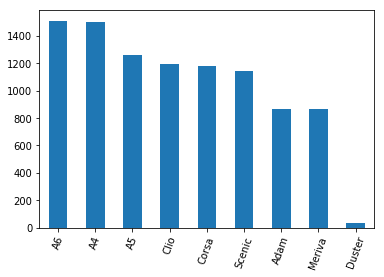

In [134]:
df_ss.model.value_counts().plot.bar(rot=70)